In [73]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [5]:
# Load the data
data = pd.read_csv('micro_world.csv', engine='python')

In [3]:
#why are the unbanked, unbanked?
#get the profile of those unbanked
    # by economy, female, age, educ, inc_q, emp_in
#Saving habits (culture)
    # fin15 (saved cos of business), fin16(oldage), fin17a(saved at a fin inst), fin17b
    # fin24 (can come up with EF), fin25 (source emergency fund)
    # saved
#knowledge in accessing (culture)
    #fin14a (paybills online), fin14b (bought online),fin14c(paid online)
#investing habits (culture)
    #fin19 (loan), fin20 (borrow)
#accessebility
    #fin2 (debit), fin5(mobileaccess to FI), fin7(credit)
#get the reason why 
    #fin11a, fin11b, fin11c, fin11d, fin11e, 
    #fin11f, fin11g, fin11h

# I want to show among the different reasons, what are their profiles?

In [230]:
phdata = data[
    data['economy'] =='Philippines'
]

In [52]:
fin11a_educ = phdata.groupby(['fin11a','educ']).mean()['age']
fin11a_educ.to_frame()

age
fin11a educ           
1.0    1.0   47.523810
       2.0   35.366197
       3.0   35.933333
2.0    1.0   46.044643
       2.0   34.369811
       3.0   37.200000
3.0    1.0   46.500000
       2.0   36.000000
4.0    3.0   58.000000

In [164]:
#for reason 1, what is the average age?
fin11a = phdata[phdata['fin11a'] == 1]
fin11b = phdata[phdata['fin11b'] == 1]
fin11c = phdata[phdata['fin11c'] == 1]
fin11d = phdata[phdata['fin11d'] == 1]
fin11e = phdata[phdata['fin11e'] == 1]
fin11f = phdata[phdata['fin11f'] == 1]
fin11g = phdata[phdata['fin11g'] == 1]
fin11h = phdata[phdata['fin11h'] == 1]

reasons = pd.DataFrame({
    'far' : fin11a['age'],
    'expensinve' : fin11b['age'],
    'documentation' : fin11c['age'],
    'trust' : fin11d['age'],
    'religion' : fin11e['age'],
    'lack_money' : fin11f['age'],
    'fam_member_has' : fin11g['age'],
    'no_need' : fin11h['age'],
})

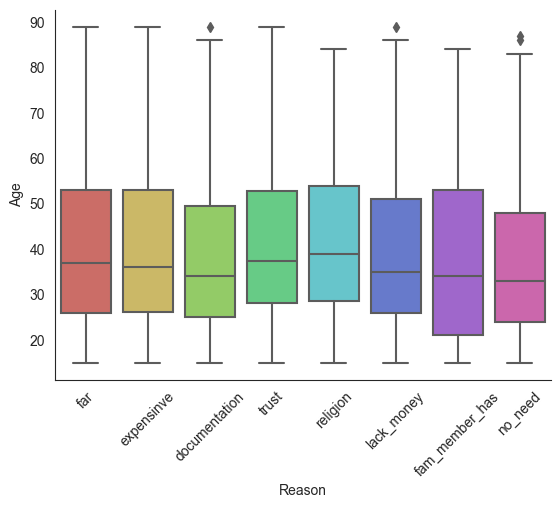

In [231]:
sns.boxplot(
    data = reasons, 
    palette = 'hls')

plt.xticks(rotation=45)
plt.xlabel('Reason')
plt.ylabel('Age')
sns.despine()
plt.show()

In [87]:
#percentage of those that saved for each reason
#length of respondents that said yes / length of total respondents

#education level of those that said yes for the different reasons
#stacked bar graph
#one bar, shaded for different educ level

#percentage of those in the workforce for those that said yes for each reason
#length of respondents that said yes / length of total respondents

In [167]:
saved_fin11a = fin11a[fin11a['saved'] == 1]
saved_fin11b = fin11b[fin11b['saved'] == 1]
saved_fin11c = fin11c[fin11c['saved'] == 1]
saved_fin11d = fin11d[fin11d['saved'] == 1]
saved_fin11e = fin11e[fin11e['saved'] == 1]
saved_fin11f = fin11f[fin11f['saved'] == 1]
saved_fin11g = fin11g[fin11g['saved'] == 1]
saved_fin11h = fin11h[fin11h['saved'] == 1]

In [168]:
per_saved_fin11a = (len(saved_fin11a)*100)/len(phdata)
per_saved_fin11b = (len(saved_fin11b)*100)/len(phdata)
per_saved_fin11c = (len(saved_fin11c)*100)/len(phdata)
per_saved_fin11d = (len(saved_fin11d)*100)/len(phdata)
per_saved_fin11e = (len(saved_fin11e)*100)/len(phdata)
per_saved_fin11f = (len(saved_fin11f)*100)/len(phdata)
per_saved_fin11g = (len(saved_fin11g)*100)/len(phdata)
per_saved_fin11h = (len(saved_fin11h)*100)/len(phdata)

saved_data = [
    ['far',per_saved_fin11a],
    ['expensive',per_saved_fin11b],
    ['documentation',per_saved_fin11c],
    ['trust',per_saved_fin11d],
    ['religion',per_saved_fin11e],
    ['lack_money',per_saved_fin11f],
    ['fam_member_has',per_saved_fin11g],
    ['no_need',per_saved_fin11h]
]

df_saved_data = pd.DataFrame(
    saved_data, 
    columns = ['Reason','% that Saved']
)
df_saved_data

C:\Users\Sofia Calvo\Documents\Eskwelabs - DS Cohort 10 Sprint 1 Materials\Sprint1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


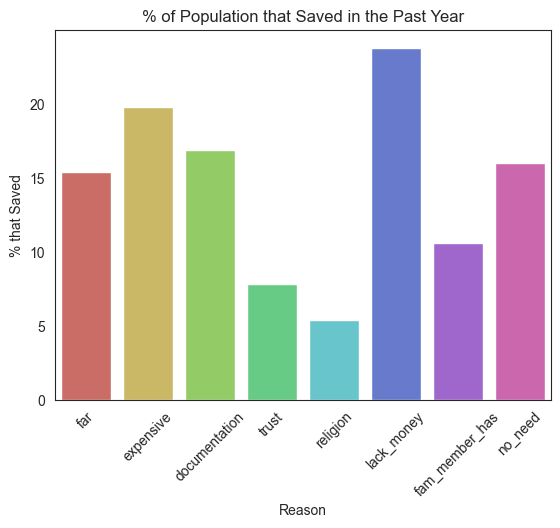

In [232]:
sns.barplot(
    df_saved_data['Reason'],
    df_saved_data['% that Saved'],
    palette = 'hls'
    
)

plt.title('% of Population that Saved in the Past Year')
plt.xticks(rotation=45)
plt.show()